#**Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading Dataset**

In [5]:
df=pd.read_csv('Healthcare.csv')

In [6]:
df.head()

,Patient_ID,Age,Gender,Symptoms,Symptom_Count,Disease
0,1,29,Male,"fever, back pain, shortness of breath",3,Allergy
1,2,76,Female,"insomnia, back pain, weight loss",3,Thyroid Disorder
2,3,78,Male,"sore throat, vomiting, diarrhea",3,Influenza
3,4,58,Other,"blurred vision, depression, weight loss, muscl...",4,Stroke
4,5,55,Female,"swelling, appetite loss, nausea",3,Heart Disease


In [7]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Symptoms,0
Symptom_Count,0
Disease,0


In [8]:
df.shape

(25000, 6)

In [9]:
df.describe()

,Patient_ID,Age,Symptom_Count
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,45.302240,5.001440
std,7217.022701,26.106224,1.415796
min,1.000000,1.000000,3.000000
25%,6250.750000,23.000000,4.000000
50%,12500.500000,45.000000,5.000000
75%,18750.250000,68.000000,6.000000
max,25000.000000,90.000000,7.000000


In [10]:
df['Disease'].value_counts()

,count
Disease,
Anxiety,911
Arthritis,896
Food Poisoning,871
Depression,859
Allergy,858
Bronchitis,856
Dermatitis,856
Thyroid Disorder,855
Migraine,854


In [11]:
#Applying Label Encoder on selected diseases.
top2 = df['Disease'].value_counts().head(2).index
data = df[df['Disease'].isin(top2)]

In [12]:
print(data['Disease'].value_counts())

Disease
Anxiety      911
Arthritis    896
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Disease_encoded'] = le.fit_transform(data['Disease'])

/tmp/ipython-input-3850895859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Disease_encoded'] = le.fit_transform(data['Disease'])


In [14]:
data.head()

,Patient_ID,Age,Gender,Symptoms,Symptom_Count,Disease,Disease_encoded
12,13,52,Female,"sweating, swelling, cough, diarrhea, appetite ...",5,Arthritis,1
26,27,3,Other,"runny nose, abdominal pain, fatigue, diarrhea,...",5,Arthritis,1
55,56,25,Female,"rash, chest pain, appetite loss, diarrhea, swe...",6,Anxiety,0
57,58,14,Other,"dizziness, fever, fatigue, shortness of breath...",7,Arthritis,1
61,62,86,Female,"back pain, chest pain, abdominal pain",3,Arthritis,1


In [15]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Anxiety': np.int64(0), 'Arthritis': np.int64(1)}


In [16]:
data.shape

(1807, 7)

#**Data cleaning**

In [17]:
#Checking Duplicate values
data.duplicated().sum()

np.int64(0)

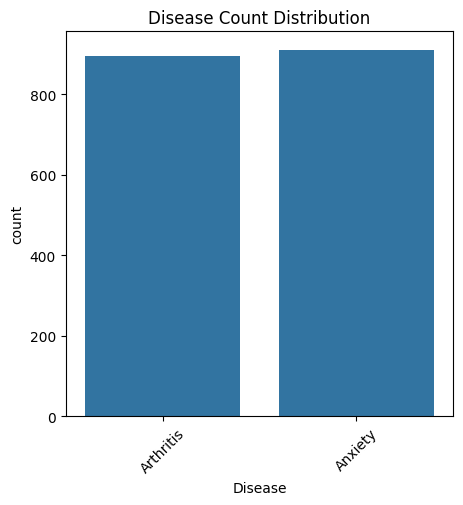

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.countplot(x=data['Disease'])
plt.xticks(rotation=45)
plt.title("Disease Count Distribution")
plt.show()

#**Balancing the Data**

In [19]:
arthritis=data[data['Disease_encoded']==0]

In [20]:
anxiety=data[data['Disease_encoded']==1]

In [21]:
print("Arthritis Patients:",arthritis.shape)
print("Anxiety Patients:",anxiety.shape)

Arthritis Patients: (911, 7)
Anxiety Patients: (896, 7)


In [22]:
#Balancing the Data according to Anxiety patients
arthritis=arthritis.sample(anxiety.shape[0])
arthritis.shape

(896, 7)

In [23]:
#Checking the shape of the data
arthritis.shape,anxiety.shape

((896, 7), (896, 7))

#**Data Preprocessing**

In [24]:
import nltk
nltk.download("punkt_tab")
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [28]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [29]:
data['Symptoms'].apply(transform_text)

,Symptoms
12,sweat swell cough diarrhea appetit loss
26,runni nose abdomin pain fatigu diarrhea sore t...
55,rash chest pain appetit loss diarrhea swell fever
57,dizzi fever fatigu short breath nausea weight ...
61,back pain chest pain abdomin pain
...,...
24906,joint pain back pain vomit depress diarrhea
24911,dizzi depress anxieti
24953,short breath diarrhea sneez back pain depress ...
24969,sweat appetit loss tremor


In [30]:
data['transformed_text']=data['Symptoms'].apply(transform_text)

/tmp/ipython-input-908606517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text']=data['Symptoms'].apply(transform_text)


In [31]:
data.head()

,Patient_ID,Age,Gender,Symptoms,Symptom_Count,Disease,Disease_encoded,transformed_text
12,13,52,Female,"sweating, swelling, cough, diarrhea, appetite ...",5,Arthritis,1,sweat swell cough diarrhea appetit loss
26,27,3,Other,"runny nose, abdominal pain, fatigue, diarrhea,...",5,Arthritis,1,runni nose abdomin pain fatigu diarrhea sore t...
55,56,25,Female,"rash, chest pain, appetite loss, diarrhea, swe...",6,Anxiety,0,rash chest pain appetit loss diarrhea swell fever
57,58,14,Other,"dizziness, fever, fatigue, shortness of breath...",7,Arthritis,1,dizzi fever fatigu short breath nausea weight ...
61,62,86,Female,"back pain, chest pain, abdominal pain",3,Arthritis,1,back pain chest pain abdomin pain


# **Represntaion through Word Cloud**

In [32]:
from wordcloud import WordCloud

In [33]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

For Arthritis Patients

In [34]:
arthritis_wc=wc.generate(data[data['Disease_encoded']==0]['transformed_text'].str.cat(sep=""))

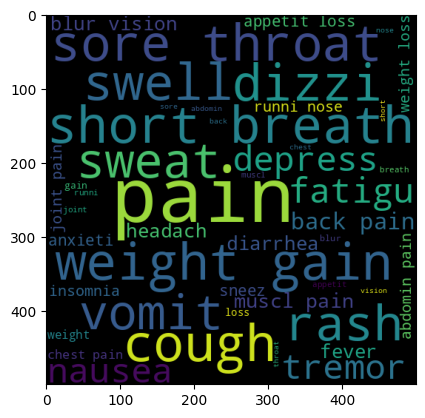

In [35]:
plt.imshow(arthritis_wc)

For Anxiety patients

In [36]:
anxiety_wc=wc.generate(data[data['Disease_encoded']==1]['transformed_text'].str.cat(sep=""))

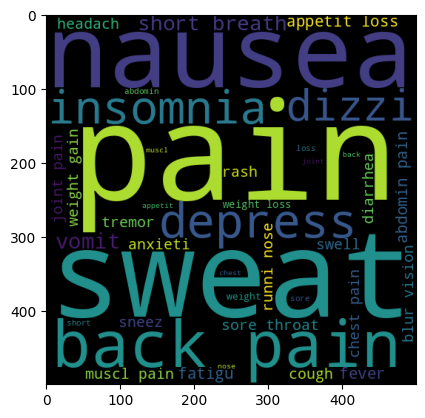

In [37]:
plt.imshow(anxiety_wc)

#**Spliting the Data**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(data['transformed_text'],data['Disease_encoded'],test_size=0.3,random_state=0,shuffle=True)

In [40]:
x_train

,transformed_text
5060,insomnia muscl pain swell abdomin pain weight ...
522,depress back pain diarrhea
12178,vomit anxieti blur vision chest pain dizzi sor...
19959,abdomin pain sweat weight loss sneez
19587,short breath diarrhea depress blur vision
...,...
11266,swell muscl pain back pain tremor
17059,insomnia diarrhea depress vomit weight loss
22559,sneez sweat abdomin pain rash fatigu dizzi
7633,vomit dizzi rash short breath muscl pain anxieti


In [41]:
y_train

,Disease_encoded
5060,0
522,1
12178,1
19959,1
19587,0
...,...
11266,0
17059,0
22559,1
7633,1


#**Building Model Pipleline Tf-idf (Random Forest)**

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [45]:
rf_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

#**Predicting the results (Random Forest)**

In [46]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [73]:
rf_pred=rf_classifier.predict(x_test)

In [74]:
#Confusion Matrix
confusion_matrix(y_test,rf_pred)

array([[139, 123],
       [146, 135]])

In [75]:
#Accuracy Score
accuracy_score(y_test,rf_pred)

0.5046040515653776

In [76]:
#Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       262
           1       0.52      0.48      0.50       281

    accuracy                           0.50       543
   macro avg       0.51      0.51      0.50       543
weighted avg       0.51      0.50      0.50       543



In [77]:
#Predicting the text
rf_classifier.predict(['swelling, appetite loss, nausea'])

array([0])

In [78]:
rf_classifier.predict(['sore throat,short breath,Weight_gain'])

array([1])

Naive Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB

In [80]:
nv_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])

In [81]:
nv_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [83]:
nv_pred=nv_classifier.predict(x_test)

In [84]:
#Accuracy Score
accuracy_score(y_test,nv_pred)

0.4843462246777164

Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
lr_classifier = Pipeline([('tfidf',TfidfVectorizer()),('clf',LogisticRegression(max_iter=2000))])


In [86]:
lr_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(max_iter=2000))])

In [91]:
lr_pred=lr_classifier.predict(x_test)

In [92]:
#Accuracy Score
accuracy_score(y_test,lr_pred)

0.4861878453038674

SVM

In [93]:
from sklearn.svm import LinearSVC

svm_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])
svm_classifier.fit(x_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [97]:
svm_pred = svm_classifier.predict(x_test)

In [100]:
print("Accuracy:", accuracy_score(y_test, svm_pred))

Accuracy: 0.4880294659300184


In [101]:
print("Accuracy Comparison:")
print("Random_Forest", accuracy_score(y_test, rf_pred))
print("Logistic_Regression:", accuracy_score(y_test, lr_pred))
print("SVM:", accuracy_score(y_test, svm_pred))
print("NAive_Bayes",accuracy_score(y_test,nv_pred))

Accuracy Comparison:
Random_Forest 0.5046040515653776
Logistic_Regression: 0.4880294659300184
SVM: 0.4880294659300184
NAive_Bayes 0.4843462246777164


Conclusion-
1.  After performing 4 models i.e Random Forest, Naive Bayes,Logistic Regression and SVM under TF-idf.
2.   It is observed that Random forest gives the better accuracy among all models i.e 52%
3. As we can see the 52% accuracy is not the best but we can increase it using Deep learning concepts
